In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
%matplotlib inline

# Load the dataset
data = pd.read_csv("census.csv")

#Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


In [2]:
data.income.value_counts(dropna=False)

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [3]:
print(data.income.head())

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object


In [4]:
n_records = len(data)
n_greater_50k = len(data[data['income'] == '>50K'])
n_at_most_50k = len(data[data['income'] == '<=50K'])

#Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k/n_records)*100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


Studying the distribution of 'captital-gain' and 'capital-loss'. Because distribution of variables can affect the ML model and can lead to  under performance.

45222


[Text(0, 0, '0'),
 Text(0, 0, '500'),
 Text(0, 0, '1000'),
 Text(0, 0, '1500'),
 Text(0, 0, '>2000')]

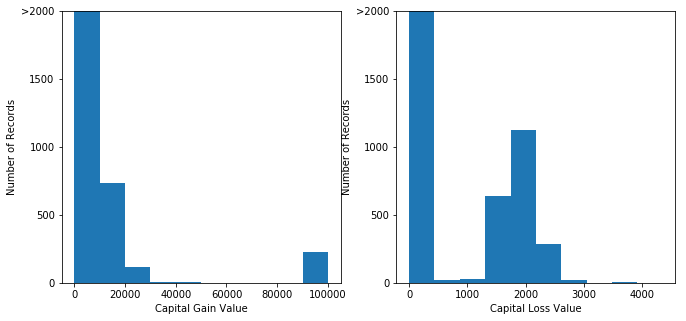

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
income_raw = data['income']
features_raw = data.drop('income', axis = 1)
print(len(data['capital-gain']))
fig1 = plt.figure(figsize = (11,5));
fig1.tight_layout()
ax = fig1.add_subplot(1, 2, 1)
#fig, axes = plt.subplots(nrows=1, ncols=2)
#fig.tight_layout()
#plt.subplot(1,2,1)
ax.hist(data['capital-gain'])
plt.xlabel('Capital Gain Value')
plt.ylabel('Number of Records')
ax.set_ylim((0, 2000))
ax.set_yticks([0, 500, 1000, 1500, 2000])
ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])
ax = fig1.add_subplot(1,2,2)
ax.hist(data['capital-loss'])
plt.xlabel('Capital Loss Value')
plt.ylabel('Number of Records')
ax.set_ylim((0, 2000))
ax.set_yticks([0, 500, 1000, 1500, 2000])
ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

For highly-skewed feature distributions such as 'capital-gain' and 'capital-loss', i will take logarithmic transformation. afterwards I will scale the numeric data using MinMaxScaler.

[Text(0, 0, '0'),
 Text(0, 0, '500'),
 Text(0, 0, '1000'),
 Text(0, 0, '1500'),
 Text(0, 0, '>2000')]

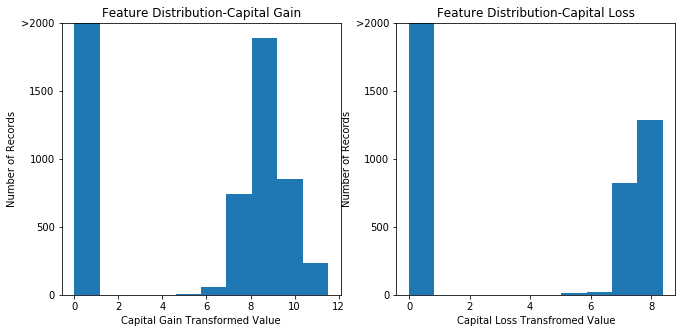

In [7]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))
#PLotting the result

fig1 = plt.figure(figsize = (11,5));
fig1.tight_layout()
ax = fig1.add_subplot(1, 2, 1)
#fig, axes = plt.subplots(nrows=1, ncols=2)
#fig.tight_layout()
#plt.subplot(1,2,1)
ax.hist(features_log_transformed['capital-gain'])
plt.xlabel('Capital Gain Transformed Value')
plt.ylabel('Number of Records')
plt.title('Feature Distribution-Capital Gain')
ax.set_ylim((0, 2000))
ax.set_yticks([0, 500, 1000, 1500, 2000])
ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])
ax = fig1.add_subplot(1,2,2)
ax.hist(features_log_transformed['capital-loss'])
plt.xlabel('Capital Loss Transfromed Value')
plt.ylabel('Number of Records')
plt.title('Feature Distribution-Capital Loss')
ax.set_ylim((0, 2000))
ax.set_yticks([0, 500, 1000, 1500, 2000])
ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

In [8]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

C:\Users\HP\Anaconda2\envs\data_analysis\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [9]:
#One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

#Encoding the 'income_raw' data to numerical values
income = pd.Series([0 if val == "<=50K" else 1 for val in income_raw])

# Printing the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))
print(encoded)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

In [10]:
# splitting and shuffling the data
from sklearn.model_selection import train_test_split

# Splitting the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

print("Training set has {} samples.".format(X_train.shape))
print("Testing set has {} samples.".format(X_test.shape))

Training set has (36177, 103) samples.
Testing set has (9045, 103) samples.


generating a naive predictor simply to show what a base model without any intelligence would look like.
Creating a model that always predicts '1' (i.e. the individual makes more than 50k) then the model will have no True Negatives(TN) or False Negatives(FN) as it is not making any negative('0' value) predictions. Therefore the Accuracy in this case becomes the same as the Precision(True Positives/(True Positives + False Positives)) as every prediction that model have made with value '1' that should have '0' becomes a False Positive; therefore the denominator in this case is the total number of records. 
The Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as there is no False Negatives.

In [11]:
TP = np.sum(income)
FP = income.count() - TP
TN = 0
FN = 0
#Calculating accuracy, precision and recall
accuracy = (TP + TN)/(TP+FP)
recall = TP/(TP + FN)
precision = TP/(TP + FP)

#Calculating F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1 + (0.5 * 0.5)) * ((precision * recall)/((0.5*precision) + recall))

print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]", (accuracy, fscore))
print(accuracy)
print(fscore)

Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}] (0.2478439697492371, 0.2756463227481997)
0.2478439697492371
0.2756463227481997


Using Logistic Regression, SVM and AdaBoost classifiers for this problem and comparing the performance of each model.

In [12]:
from sklearn.metrics import fbeta_score, accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    #Fitting the learner to the training data 
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    #Calculating the training time
    results['train_time'] = end-start
        
    # Getting the predictions on the test set
    #then getting predictions on the first 300 training samples
    start = time() # Gets start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Gets end time
    
    #Calculating the total prediction time
    results['pred_time'] = end-start
            
    #Computing accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    #Computing accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    #Computing F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train,beta=0.5)
        
    #Computing F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta =0.5)
       
    #Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

Implementation and initial evaluation of the models

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
#Initializing the three models
clf_A =LogisticRegression() 
clf_B = svm.SVC()
clf_C = AdaBoostClassifier()

#Calculating the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = int((10/100)*len(y_train))
samples_1 =int((1/100)*len(y_train))

#Collecting results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)
#print(result)
# Run metrics visualization for the three supervised learning models chosen
#vs.evaluate(results, accuracy, fscore)

C:\Users\HP\Anaconda2\envs\data_analysis\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda2\envs\data_analysis\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda2\envs\data_analysis\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.


C:\Users\HP\Anaconda2\envs\data_analysis\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\HP\Anaconda2\envs\data_analysis\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\HP\Anaconda2\envs\data_analysis\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC trained on 361 samples.
SVC trained on 3617 samples.


C:\Users\HP\Anaconda2\envs\data_analysis\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.


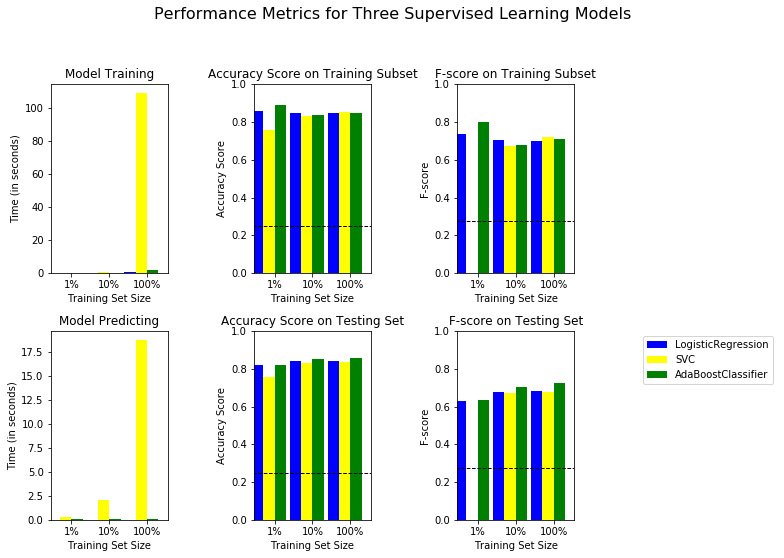

In [14]:
fig, ax = plt.subplots(2, 4, figsize = (11,7))

    # Constants
bar_width = 0.3
colors = ['blue','yellow','green']
    
    # Super loop to plot four panels of data
for k, learner in enumerate(results.keys()):
    for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
        for i in np.arange(3):
            # Creative plot code
            ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
            ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
            ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
            ax[j//3, j%3].set_xlabel("Training Set Size")
            ax[j//3, j%3].set_xlim((-0.1, 3.0))
            
# Add unique y-labels
ax[0, 0].set_ylabel("Time (in seconds)")
ax[0, 1].set_ylabel("Accuracy Score")
ax[0, 2].set_ylabel("F-score")
ax[1, 0].set_ylabel("Time (in seconds)")
ax[1, 1].set_ylabel("Accuracy Score")
ax[1, 2].set_ylabel("F-score")
    
    # Add titles
ax[0, 0].set_title("Model Training")
ax[0, 1].set_title("Accuracy Score on Training Subset")
ax[0, 2].set_title("F-score on Training Subset")
ax[1, 0].set_title("Model Predicting")
ax[1, 1].set_title("Accuracy Score on Testing Set")
ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
ax[0, 2].axhline(y = fscore, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
ax[1, 2].axhline(y = fscore, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
ax[0, 1].set_ylim((0, 1))
ax[0, 2].set_ylim((0, 1))
ax[1, 1].set_ylim((0, 1))
ax[1, 2].set_ylim((0, 1))

    # Set additional plots invisibles
ax[0, 3].set_visible(False)
ax[1, 3].axis('off')

    # Create legend
for i, learner in enumerate(results.keys()):
    plt.bar(0, 0, color=colors[i], label=learner)
plt.legend()
    
    # Aesthetics
plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
plt.tight_layout()
plt.show()            

All the models are performing well as shown in the plots above. SVM is taking more time to fit on the training data. But on 100 percent training data Adaboost is giving the best performance on both training and test data.

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
clf = AdaBoostClassifier()

# Hyperparameter Tuning
parameters = {'n_estimators':[50, 55, 60, 90, 95, 100],
             'learning_rate':np.linspace(0.5, 2, num=10)}



scorer = ftwo_scorer = make_scorer(fbeta_score, beta=0.5)

grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=scorer)

grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

C:\Users\HP\Anaconda2\envs\data_analysis\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\HP\Anaconda2\envs\data_analysis\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\HP\Anaconda2\envs\data_analysis\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\HP\Anaconda2\envs\data_analysis\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted

Unoptimized model
------
Accuracy score on testing data: 0.8576
F-score on testing data: 0.7246

Optimized Model
------
Final accuracy score on the testing data: 0.8641
Final F-score on the testing data: 0.7369


Feature Importance-By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do.

In [17]:
from sklearn.ensemble import AdaBoostClassifier

#Training the supervised model on the training set 
model = AdaBoostClassifier().fit(X_train, y_train)

#Extracting the feature importances using 
importances = model.feature_importances_
print(importances)


[0.16 0.04 0.08 0.2  0.06 0.02 0.   0.   0.   0.02 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.04 0.   0.02 0.02 0.   0.   0.
 0.   0.02 0.02 0.   0.   0.   0.   0.   0.   0.   0.02 0.02 0.02 0.02
 0.02 0.   0.02 0.02 0.02 0.02 0.   0.   0.02 0.   0.02 0.   0.02 0.
 0.   0.   0.   0.02 0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.  ]


[0.16 0.04 0.08 0.2  0.06 0.02 0.   0.   0.   0.02 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.04 0.   0.02 0.02 0.   0.   0.
 0.   0.02 0.02 0.   0.   0.   0.   0.   0.   0.   0.02 0.02 0.02 0.02
 0.02 0.   0.02 0.02 0.02 0.02 0.   0.   0.02 0.   0.02 0.   0.02 0.
 0.   0.   0.   0.02 0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.  ]
[0.2  0.16 0.08 0.06 0.04]
Final Model trained on full data
------
Accuracy on testing data: 0.8641
F-score on testing data: 0.7369

Final Model trained on reduced data
------
Accuracy on testing data: 0.8354
F-score on testing data: 0.6837


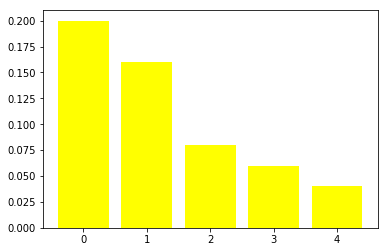

In [18]:
print(importances)
h = importances[np.argsort(importances)[::-1][:5]]
print(h)
plt.bar(np.arange(5), h, color='yellow', label='Feature Weight')# Import functionality for cloning a model
from sklearn.base import clone

# Reducing the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Training on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Making new predictions
reduced_predictions = clf.predict(X_test_reduced)

# scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Feature Selection-

In [19]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier().fit(X_train, y_train)

#Extracting the feature importances using .feature_importances_ 
importances = model.feature_importances_
print(importances)

[0.16 0.04 0.08 0.2  0.06 0.02 0.   0.   0.   0.02 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.04 0.   0.02 0.02 0.   0.   0.
 0.   0.02 0.02 0.   0.   0.   0.   0.   0.   0.   0.02 0.02 0.02 0.02
 0.02 0.   0.02 0.02 0.02 0.02 0.   0.   0.02 0.   0.02 0.   0.02 0.
 0.   0.   0.   0.02 0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.  ]


[0.2  0.16 0.08 0.06 0.04]


<BarContainer object of 5 artists>

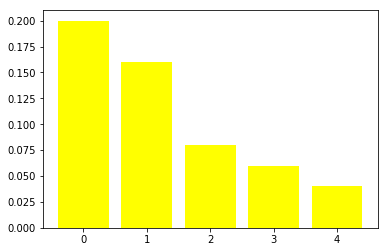

In [20]:
h = importances[np.argsort(importances)[::-1][:5]]
print(h)
plt.bar(np.arange(5), h, color='yellow', label='Feature Weight')

In [21]:
# Importing functionality for cloning a model
from sklearn.base import clone

# Reducing the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Training on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Making new predictions
reduced_predictions = clf.predict(X_test_reduced)

#scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8641
F-score on testing data: 0.7369

Final Model trained on reduced data
------
Accuracy on testing data: 0.8354
F-score on testing data: 0.6837
